## Part I: Regressions

#### Imports

In [1]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols as sm_ols
import seaborn as sns

#### Load Data

In [2]:
Commodities_DF = pd.read_csv('output_data/commodities_df.csv')

In [3]:
Commodities_DF['sp500_rets'] = (np.log(Commodities_DF['sp500_Price'].shift(-1)) 
                                       - np.log(Commodities_DF['sp500_Price']))

# using rf rate of 2.92%
Commodities_DF['market_risk_prem'] = ((Commodities_DF['sp500_rets'].rolling(60, min_periods = 0).mean()) - (0.0292/12))

# use weighted avg to ensure positive market risk premiums
Commodities_DF['market_risk_prem'] = (0.2 * Commodities_DF['market_risk_prem']) + (0.8 * 0.00407)

Commodities_DF['C_TAVG'] = Commodities_DF[['C_TMAX', 'C_TMIN']].mean(axis=1)
Commodities_DF['S_TAVG'] = Commodities_DF[['S_TMAX', 'S_TMIN']].mean(axis=1)
Commodities_DF['W_TAVG'] = Commodities_DF[['W_TMAX', 'W_TMIN']].mean(axis=1)

#### Corn Regressions

In [4]:
#Model 1 
corn1 = sm_ols('realized_ret_corn ~ (market_risk_prem)',data=Commodities_DF).fit()

corn1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      realized_ret_corn   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.01041
Date:                Tue, 03 May 2022   Prob (F-statistic):              0.919
Time:                        22:51:50   Log-Likelihood:                 393.25
No. Observations:                 357   AIC:                            -782.5
Df Residuals:                     355   BIC:                            -774.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0006      0.015     -0.039      0.969      -0.029       0.028
market_risk_prem     0.3549      3.479      0.102      0.919      -6.487       7.197
==============================================================================
Omnibus:                       36.225   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.816
Skew:                          -0.569   Prob(JB):                     2.54e-16
Kurtosis:                       4.880   Cond. No.                         815.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
#Model 2
corn2 = sm_ols('realized_ret_corn ~ market_risk_prem + ret_gdp + ret_cpi + UNRATE + sp500_rets', data=Commodities_DF).fit()

corn2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      realized_ret_corn   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     2.521
Date:                Tue, 03 May 2022   Prob (F-statistic):             0.0293
Time:                        22:51:50   Log-Likelihood:                 399.54
No. Observations:                 357   AIC:                            -787.1
Df Residuals:                     351   BIC:                            -763.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0031      0.031      0.100      0.921      -0.057       0.063
market_risk_prem    -1.0780      4.085     -0.264      0.792      -9.113       6.957
ret_gdp              0.0187      0.671      0.028      0.978      -1.302       1.339
ret_cpi             -0.3943      1.671     -0.236      0.814      -3.681       2.892
UNRATE            8.175e-05      0.003      0.026      0.979      -0.006       0.006
sp500_rets           0.3651      0.104      3.510      0.001       0.161       0.570
==============================================================================
Omnibus:                       31.661   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.770
Skew:                          -0.489   Prob(JB):                     8.62e-15
Kurtosis:                       4.843   Cond. No.                     5.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
#Model 3
corn3 = sm_ols('realized_ret_corn ~ market_risk_prem + ret_gdp + ret_cpi + UNRATE + sp500_rets + C_PRCP + C_SNOW + C_TMAX + C_TMIN', data=Commodities_DF).fit()

corn3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      realized_ret_corn   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.974
Date:                Tue, 03 May 2022   Prob (F-statistic):             0.0424
Time:                        22:51:51   Log-Likelihood:                 333.29
No. Observations:                 285   AIC:                            -646.6
Df Residuals:                     275   BIC:                            -610.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0072      0.035      0.206      0.837      -0.062       0.076
market_risk_prem    -0.2383      4.151     -0.057      0.954      -8.410       7.934
ret_gdp              0.1622      0.703      0.231      0.818      -1.221       1.546
ret_cpi             -0.7320      1.738     -0.421      0.674      -4.154       2.690
UNRATE               0.0014      0.003      0.418      0.676      -0.005       0.008
sp500_rets           0.3448      0.108      3.191      0.002       0.132       0.557
C_PRCP            6.265e-05   7.43e-05      0.843      0.400   -8.36e-05       0.000
C_SNOW              -0.0003      0.000     -1.096      0.274      -0.001       0.000
C_TMAX             -7.5e-05      0.000     -0.679      0.498      -0.000       0.000
C_TMIN            2.621e-06      0.000      0.021      0.984      -0.000       0.000
==============================================================================
Omnibus:                       24.655   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.981
Skew:                          -0.406   Prob(JB):                     4.23e-13
Kurtosis:                       5.034   Cond. No.                     2.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Soybeans Regressions

In [7]:
#Model 4 
soybeans1 = sm_ols('realized_ret_soybeans ~ (market_risk_prem)',data=Commodities_DF).fit()

soybeans1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     realized_ret_soybeans   R-squared:                       0.001
Model:                               OLS   Adj. R-squared:                 -0.002
Method:                    Least Squares   F-statistic:                    0.2513
Date:                   Tue, 03 May 2022   Prob (F-statistic):              0.616
Time:                           22:51:51   Log-Likelihood:                 434.05
No. Observations:                    357   AIC:                            -864.1
Df Residuals:                        355   BIC:                            -856.3
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0071      0.013      0.549      0.584      -0.018       0.033
market_risk_prem    -1.5558      3.103     -0.501      0.616      -7.659       4.547
==============================================================================
Omnibus:                       69.882   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.918
Skew:                          -0.901   Prob(JB):                     1.05e-43
Kurtosis:                       6.172   Cond. No.                         815.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#Model 5
soybeans2 = sm_ols('realized_ret_soybeans ~ market_risk_prem + ret_gdp + ret_cpi + UNRATE + sp500_rets', data=Commodities_DF).fit()

soybeans2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     realized_ret_soybeans   R-squared:                       0.049
Model:                               OLS   Adj. R-squared:                  0.036
Method:                    Least Squares   F-statistic:                     3.633
Date:                   Tue, 03 May 2022   Prob (F-statistic):            0.00323
Time:                           22:51:51   Log-Likelihood:                 442.93
No. Observations:                    357   AIC:                            -873.9
Df Residuals:                        351   BIC:                            -850.6
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0098      0.027      0.362      0.718      -0.044       0.063
market_risk_prem    -2.9067      3.618     -0.803      0.422     -10.022       4.208
ret_gdp             -0.5800      0.594     -0.976      0.330      -1.749       0.589
ret_cpi              1.2068      1.480      0.815      0.415      -1.704       4.118
UNRATE            8.595e-06      0.003      0.003      0.998      -0.005       0.005
sp500_rets           0.3714      0.092      4.032      0.000       0.190       0.553
==============================================================================
Omnibus:                       66.462   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.039
Skew:                          -0.849   Prob(JB):                     1.99e-42
Kurtosis:                       6.166   Cond. No.                     5.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
#Model 6
soybeans3 = sm_ols('realized_ret_soybeans ~ market_risk_prem + ret_gdp + ret_cpi + UNRATE + sp500_rets + S_PRCP + S_SNOW + S_TMAX + S_TMIN', data=Commodities_DF).fit()

soybeans3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     realized_ret_soybeans   R-squared:                       0.060
Model:                               OLS   Adj. R-squared:                  0.028
Method:                    Least Squares   F-statistic:                     1.899
Date:                   Tue, 03 May 2022   Prob (F-statistic):             0.0522
Time:                           22:51:51   Log-Likelihood:                 339.79
No. Observations:                    277   AIC:                            -659.6
Df Residuals:                        267   BIC:                            -623.3
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0121      0.034      0.359      0.720      -0.054       0.079
market_risk_prem    -2.9791      3.915     -0.761      0.447     -10.688       4.729
ret_gdp             -0.6377      0.672     -0.949      0.343      -1.961       0.685
ret_cpi              0.7117      1.707      0.417      0.677      -2.649       4.072
UNRATE               0.0005      0.003      0.140      0.889      -0.006       0.007
sp500_rets           0.3819      0.109      3.517      0.001       0.168       0.596
S_PRCP            3.793e-06   7.18e-05      0.053      0.958      -0.000       0.000
S_SNOW              -0.0002      0.000     -1.188      0.236      -0.001       0.000
S_TMAX           -2.758e-05   8.78e-05     -0.314      0.754      -0.000       0.000
S_TMIN           -2.287e-05   9.87e-05     -0.232      0.817      -0.000       0.000
==============================================================================
Omnibus:                       58.227   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.029
Skew:                          -0.870   Prob(JB):                     7.37e-43
Kurtosis:                       6.712   Cond. No.                     1.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Wheat Regressions

In [10]:
#Model 7
wheat1 = sm_ols('realized_ret_wheat ~ (market_risk_prem)',data=Commodities_DF).fit()

wheat1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     realized_ret_wheat   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.03672
Date:                Tue, 03 May 2022   Prob (F-statistic):              0.848
Time:                        22:51:51   Log-Likelihood:                 372.69
No. Observations:                 355   AIC:                            -741.4
Df Residuals:                     353   BIC:                            -733.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0043      0.015      0.280      0.780      -0.026       0.035
market_risk_prem    -0.7131      3.721     -0.192      0.848      -8.031       6.605
==============================================================================
Omnibus:                        6.747   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                9.900
Skew:                           0.080   Prob(JB):                      0.00708
Kurtosis:                       3.802   Cond. No.                         826.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
#Model 8
wheat2 = sm_ols('realized_ret_wheat ~ market_risk_prem + ret_gdp + ret_cpi + UNRATE + sp500_rets', data=Commodities_DF).fit()

wheat2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     realized_ret_wheat   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2.204
Date:                Tue, 03 May 2022   Prob (F-statistic):             0.0535
Time:                        22:51:51   Log-Likelihood:                 378.19
No. Observations:                 355   AIC:                            -744.4
Df Residuals:                     349   BIC:                            -721.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0194      0.033      0.592      0.554      -0.045       0.084
market_risk_prem    -3.2112      4.386     -0.732      0.465     -11.838       5.415
ret_gdp              0.3436      0.710      0.484      0.629      -1.052       1.739
ret_cpi              0.2033      1.771      0.115      0.909      -3.279       3.686
UNRATE              -0.0015      0.003     -0.465      0.643      -0.008       0.005
sp500_rets           0.3585      0.110      3.252      0.001       0.142       0.575
==============================================================================
Omnibus:                        5.917   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                7.353
Skew:                           0.144   Prob(JB):                       0.0253
Kurtosis:                       3.644   Cond. No.                     6.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
#Model 9
wheat3 = sm_ols('realized_ret_wheat ~ market_risk_prem + ret_gdp + ret_cpi + UNRATE + sp500_rets + W_PRCP + W_SNOW + W_TMAX + W_TMIN', data=Commodities_DF).fit()

wheat3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     realized_ret_wheat   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     2.046
Date:                Tue, 03 May 2022   Prob (F-statistic):             0.0349
Time:                        22:51:51   Log-Likelihood:                 296.49
No. Observations:                 266   AIC:                            -573.0
Df Residuals:                     256   BIC:                            -537.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0050      0.039      0.128      0.899      -0.072       0.082
market_risk_prem    -1.8263      4.479     -0.408      0.684     -10.648       6.995
ret_gdp              0.9930      0.766      1.297      0.196      -0.515       2.501
ret_cpi             -1.0529      1.854     -0.568      0.571      -4.704       2.598
UNRATE              -0.0007      0.004     -0.183      0.855      -0.008       0.007
sp500_rets           0.3789      0.119      3.179      0.002       0.144       0.614
W_PRCP           -2.416e-06      0.000     -0.021      0.983      -0.000       0.000
W_SNOW               0.0002      0.000      0.790      0.430      -0.000       0.001
W_TMAX            3.731e-06      0.000      0.035      0.972      -0.000       0.000
W_TMIN               0.0002      0.000      1.107      0.270      -0.000       0.001
==============================================================================
Omnibus:                        1.799   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.407   Jarque-Bera (JB):                1.498
Skew:                           0.118   Prob(JB):                        0.473
Kurtosis:                       3.282   Cond. No.                     1.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Visualizing Regression Relationships

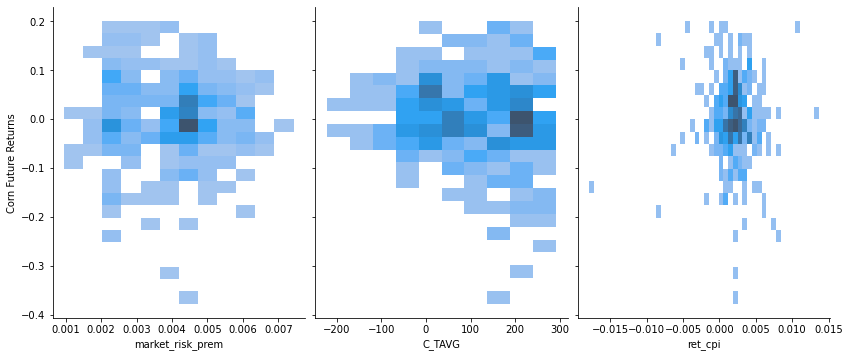

In [13]:
#Corn

plot1 = sns.pairplot(Commodities_DF, x_vars=["market_risk_prem", "C_TAVG", "ret_cpi"], y_vars = ["realized_ret_corn"], 
             height = 5, aspect = .8, kind='hist').set(ylabel = "Corn Future Returns")
plot1;

plot1.savefig("output_data/Corn_Correlations_Hist.png")

#title = "Monthly Corn Futures Returns vs Select Independent Variables"

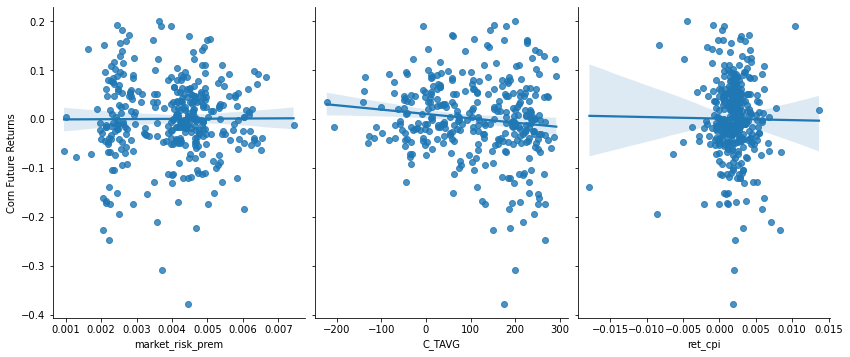

In [14]:
#corn
plot1a = sns.pairplot(Commodities_DF, x_vars=["market_risk_prem", "C_TAVG", "ret_cpi"], y_vars = ["realized_ret_corn"], 
             height = 5, aspect = .8, kind='reg').set(ylabel = "Corn Future Returns")
plot1a;

plot1a.savefig("output_data/Corn_Correlations_Reg.png")

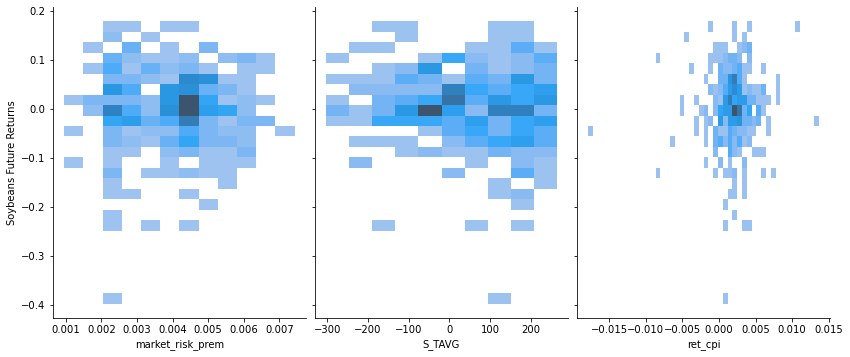

In [15]:
#soybeans
plot2 = sns.pairplot(Commodities_DF, x_vars=["market_risk_prem", "S_TAVG", "ret_cpi"], y_vars = ["realized_ret_soybeans"], 
             height = 5, aspect = .8, kind='hist').set(ylabel = "Soybeans Future Returns")
plot2;

plot2.savefig("output_data/Soybeans_Correlations_Hist.png")

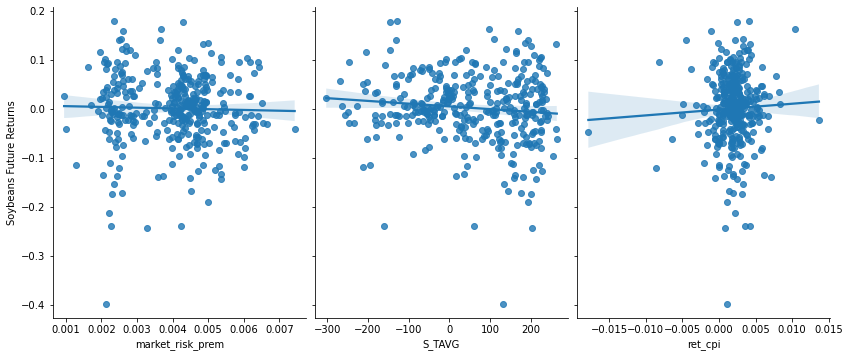

In [16]:
#soybeans
plot2a = sns.pairplot(Commodities_DF, x_vars=["market_risk_prem", "S_TAVG", "ret_cpi"], y_vars = ["realized_ret_soybeans"], 
             height = 5, aspect = .8, kind='reg').set(ylabel = "Soybeans Future Returns")
plot2a;

plot2a.savefig("output_data/Soybeans_Correlations_Reg.png")

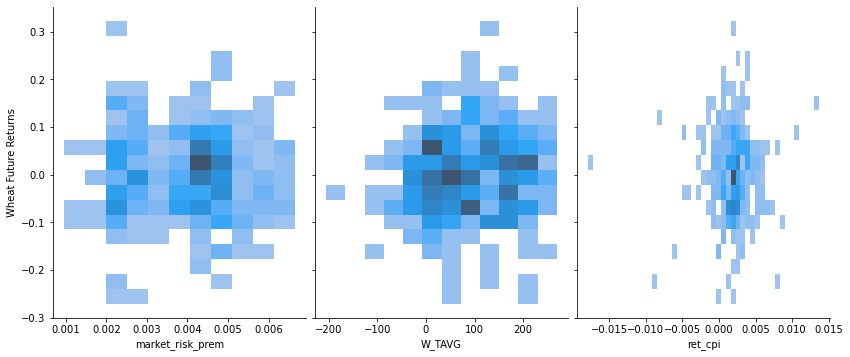

In [17]:
#wheat
plot3 = sns.pairplot(Commodities_DF, x_vars=["market_risk_prem", "W_TAVG", "ret_cpi"], y_vars = ["realized_ret_wheat"], 
             height = 5, aspect = .8, kind='hist').set(ylabel = "Wheat Future Returns")
plot3;

plot3.savefig("output_data/Wheat_Correlations_Hist.png")

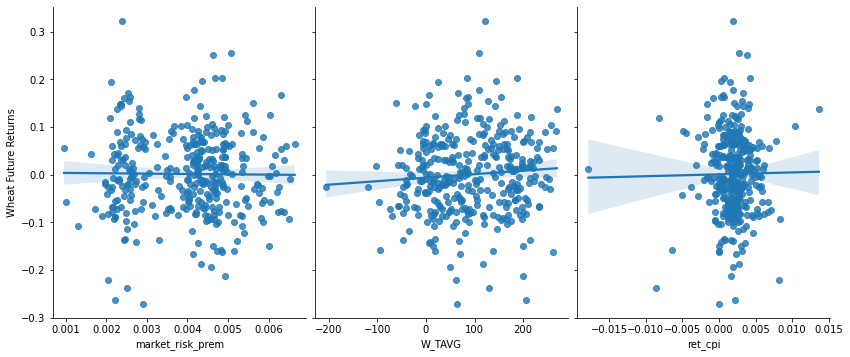

In [18]:
#wheat
plot3a = sns.pairplot(Commodities_DF, x_vars=["market_risk_prem", "W_TAVG", "ret_cpi"], y_vars = ["realized_ret_wheat"], 
             height = 5, aspect = .8, kind='reg').set(ylabel = "Wheat Future Returns")
plot3a;

plot3a.savefig("output_data/Wheat_Correlations_Reg.png")